In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PratikBorkar04/consignment_pricing/main/notebook/dataset/final_dataset.csv")

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.head(1)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,4521,India,3157


In [6]:
#Preapare X and y variables
X = df.drop(columns=['freight_cost'],axis=1)

In [7]:
X.head()

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,India,3157
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360,3,0.07,1855,India,3157
2,Vietnam,Direct Drop,EXW,Air,60,38000,121600,3,0.05,7590,India,3157
3,Nigeria,Direct Drop,EXW,Air,240,416,2225,5,0.02,504,India,7633
4,Tanzania,Direct Drop,EXW,Air,60,16667,60834,3,0.06,1478,India,5659


In [8]:
y = df['freight_cost']


In [10]:
y

0        4521
1       16007
2       45450
3        5920
4        6212
        ...  
6497    10181
6498    10181
6499    10181
6500    10181
6501    10181
Name: freight_cost, Length: 6502, dtype: int64

In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)
X.shape

(6502, 48)

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5201, 48), (1301, 48))

In [14]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 8604.5300
- Mean Absolute Error: 4282.8879
- R2 Score: 0.3415
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11104.0745
- Mean Absolute Error: 4797.4313
- R2 Score: 0.1383


Lasso
Model performance for Training set
- Root Mean Squared Error: 8605.9793
- Mean Absolute Error: 4286.2697
- R2 Score: 0.3413
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11102.2032
- Mean Absolute Error: 4792.5296
- R2 Score: 0.1385


Ridge
Model performance for Training set
- Root Mean Squared Error: 8605.1600
- Mean Absolute Error: 4285.6191
- R2 Score: 0.3414
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11101.4980
- Mean Absolute Error: 4795.4254
- R2 Score: 0.1387


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6530.0279
- Mean Absolute Error: 2745.48

In [16]:
#Results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
6,XGBRegressor,0.648955
7,CatBoosting Regressor,0.638665
5,Random Forest Regressor,0.607793
3,K-Neighbors Regressor,0.413402
4,Decision Tree,0.385737
8,AdaBoost Regressor,0.238716
2,Ridge,0.138652
1,Lasso,0.138543
0,Linear Regression,0.138252


In [25]:
#XGBRegressor
XGBRegressor_model = XGBRegressor()
XGBRegressor_model = XGBRegressor_model.fit(X_train, y_train)
y_pred = XGBRegressor_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 64.90


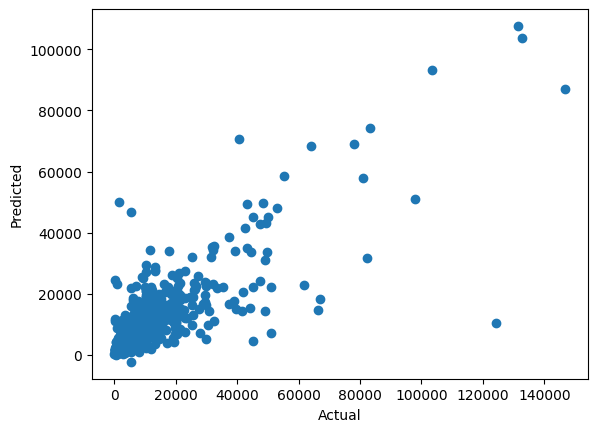

In [26]:
#Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

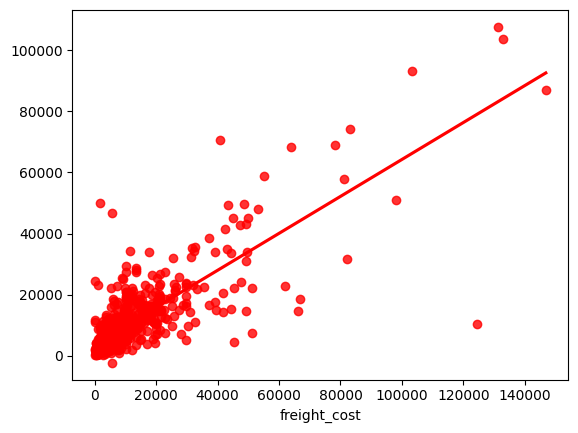

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
3107,1332,5016.603027,-3684.603027
4885,4370,8901.798828,-4531.798828
1867,5265,8040.426758,-2775.426758
3269,971,1044.601685,-73.601685
5510,10181,11497.166016,-1316.166016
...,...,...,...
1608,32104,23312.962891,8791.037109
2191,5460,12382.879883,-6922.879883
624,13353,6241.560059,7111.439941
69,10181,10473.586914,-292.586914
